In [4]:
import ticktack                 # For the compilation of the model
import ode                      # As a method of solving the odes
import numpy as np              # For the basic functions that need to be written
from jax import numpy as jnp    # annoying shit that I wish I didn't hav to deal with 

In [5]:
parameters = np.zeros(6)            # Empty array to hold the parameters of the prodcution function 
parameters[0] = 7.044873503263437   # Mean of the sinusoidal production 
parameters[1] = 0.18                # Amplitude of the sinusoidal production 
parameters[2] = 11.0                # Period of the sinusoidal production 
parameters[3] = 1.25                # Phase of the sinusoidal production 
parameters[4] = 120.05769867244142  # Height of the super-gaussian 
parameters[5] = 12.0                # Width of the super-gaussian 

In [6]:
projection = np.zeros(11)   # An array to hold the projection of the production function 
projection[0] = 0.7         # Proportion projection into the stratosphere       
projection[1] = 0.3         # Proportion projection into the troposphere

In [7]:
def production(t):    
    """
    The production function defined as the sum of sinusoidal and super-gaussian terms 
    """
    return parameters[0] * (1 + parameters[1] * \
        jnp.sin(2 * jnp.pi / parameters[2] * t + parameters[3])) + \
        parameters[4] * jnp.exp(- (parameters[5] * (t - 775)) ** 16)

In [8]:
cbm = ticktack.load_presaved_model("Guttler14", production_rate_units="atoms/cm^2/s")
cbm.compile()   # Constructing the transfer operator 

The following array represents the position of the system following the burn in period. Instead of running this in python I just pirated the julia results because it was easier to do this.

In [9]:
u0 = np.array([135.76261605786132, 709.7591911307035,
    1191.489526709938, 3.97158546945107, 45158.65854589925,
    155.54703228960028, 634.290736403387, 423.5954241095565,
    1808.3343542055652, 665.933052175064, 7348.751626918585])

In [10]:
def dydx(y, t):
    """
    The gradient of the carbon box model.
    """
    return cbm._matrix @ y + production(t) * projection

In [34]:
carbon_concentrations, _ = ode.odeint(dydx, u0, np.arange(760.0, 790.0, 1))    # Running the ode

In [33]:
carbon_concentrations.shape

DeviceArray(1271., dtype=float64, weak_type=True)

/home/jordan/anaconda3/envs/ticktack/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: x and y must have same first dimension, but have shapes (30,) and (2,)

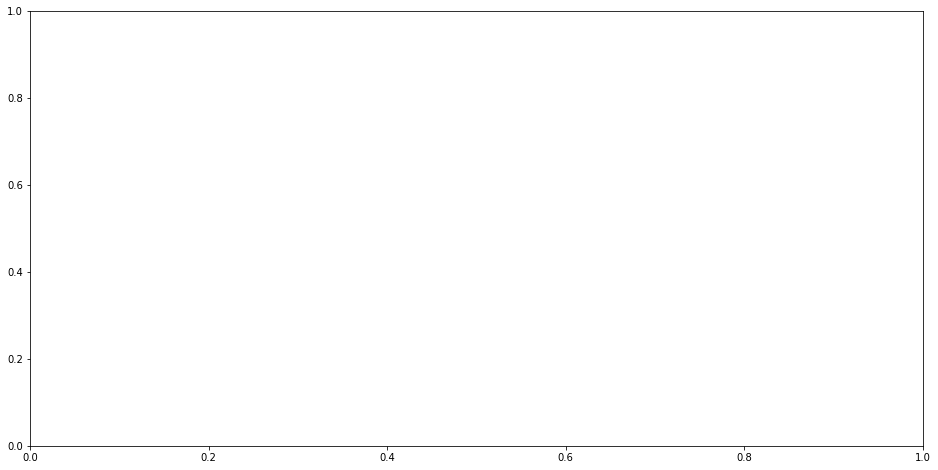

In [13]:
import matplotlib.pyplot as plt # Plotting library for visualisations

plt.plot(np.arange(760.0, 790.0, 1), carbon_concentrations) # Plotting the entire data 
plt.show()                      # Showing the plot 